In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
#pip install statsmodels
import statsmodels

In [3]:
df=pd.read_csv("AirPassengers.csv")
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
df.set_index('Month') # month set to index column
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [6]:
df.rename(columns={"#Passengers":"Passengers"},inplace=True)
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [7]:
x=df.index
x

RangeIndex(start=0, stop=144, step=1)

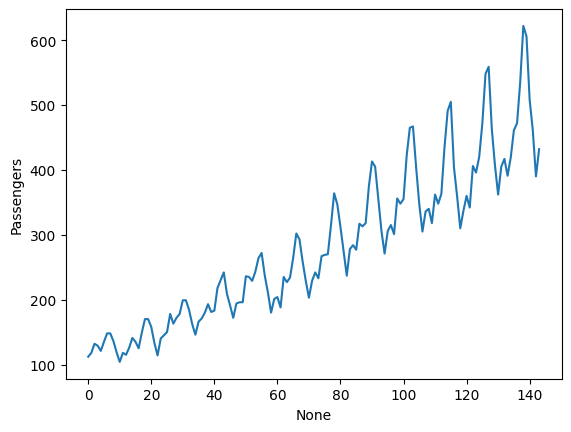

In [8]:
# for time series data always use line plot...its sequential data right?

sns.lineplot(x=df.index,y=df["Passengers"])
# df having 0-143 records,in that range line plot should be plotted

plt.show()

# Data is stationary or not...by using mean and std

# **Checking for Stationarity**
- Method 1 : **Rolling statistics** 

In [9]:
rolmean = df["Passengers"].rolling(window=12).mean()
rolstd = df["Passengers"].rolling(window=12).std()
# window 12 means 1 year = 12 months

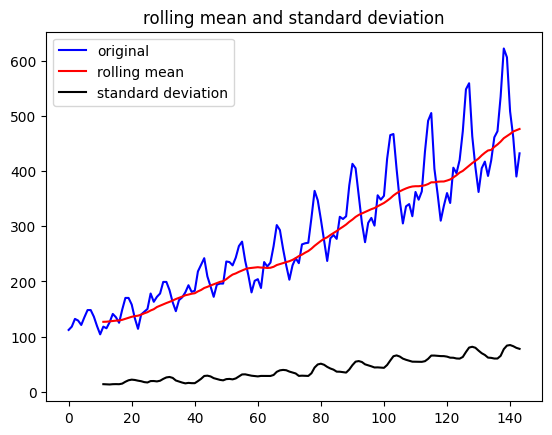

In [10]:
# Plotting rolling statistics...
orig = plt.plot(df["Passengers"],color='blue',label = 'original')
mean = plt.plot(rolmean,color='red',label = 'rolling mean')
std = plt.plot(rolstd,color='black',label = 'standard deviation')
plt.title("rolling mean and standard deviation")
#plt.xticks(ticks = df.index)
plt.legend()
plt.show()

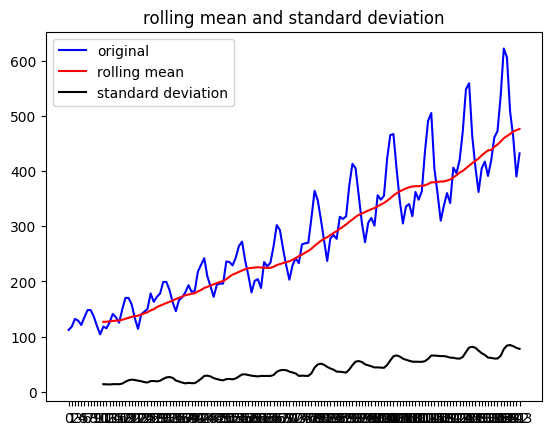

In [11]:
# Plotting rolling statistics...
orig = plt.plot(df["Passengers"],color='blue',label = 'original')
mean = plt.plot(rolmean,color='red',label = 'rolling mean')
std = plt.plot(rolstd,color='black',label = 'standard deviation')
plt.title("rolling mean and standard deviation")
plt.xticks(ticks = df.index)
plt.legend()
plt.show()

# From the above conclude that it was a non stationary(not stationary data) data by the red line(mean)...
- constant mean + constant std/variance = stationary data

# Method 2 ~ Augmented Dicky fuller test(ADF test)
#for the ADF test
- h0: non stationary
- h1: stationary
#these are all locked...based on p value will decide

In [35]:
from statsmodels.tsa.stattools import adfuller
adfuller_result = adfuller(df["Passengers"])
print("P-value : ",adfuller_result[1])

P-value :  0.991880243437641


In [40]:
# coverting the data into stationary...by differencing the data 
# differencing...
diff = df["Passengers"]-df["Passengers"].shift(2)
# shift value is trail and error, not fixed
diff.dropna(inplace = True)
# starting 2 values will be null so, removed

# now checking p value by using dicky fuller method

adfuller_result = adfuller(diff)
print("P-value : ",adfuller_result[1])

# now it is time series data was stationary means equal variance

P-value :  0.038629757676988535


In [14]:
diff.shape

(142,)

In [41]:
142*0.8


113.60000000000001

# train test split...must be done sequentially becoz it is time series data
# first 80% data is for train(0-113) = 0.8*142 = 114, for test(114-141) = 28

In [16]:
y_train = diff[:114]
y_test = diff[114:]
y_train.shape

(114,)

# There are 5 models for TIME SERIES using MACHINE LEARNING...
- AR - Auto Regression - Linear Regression on selected records(p) - 
       #p value is fixed came from PACF plot
       #PACF - partial auto corelation function
       #PACF plot will tell records to be consider,which record having more correlation(p)
- MA - Moving Average - Rolling Mean on Selected records(q)
       #q value is fixed came from ACF plot 
       #ACF -Auto corelation function
       #ACF plot will tell records to be consider,which record having more correlation(q)
- ARMA - AR (p value from PACF plot) + MA (q value from ACF plot) 
- ARIMA - AR + I (d value, trail and error) + MA, i = integration, ex: i =1,2,3
      #i value is trail and error (do hyperparameter tunning)

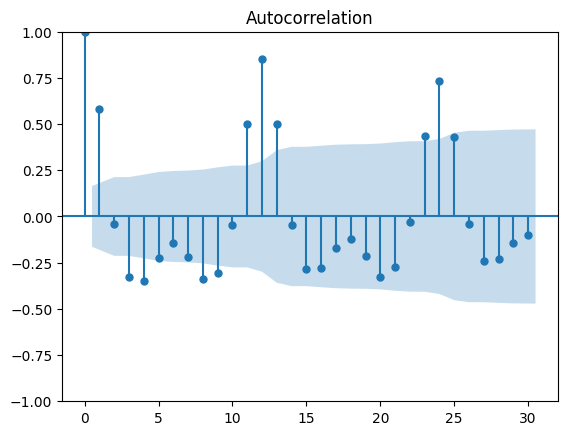

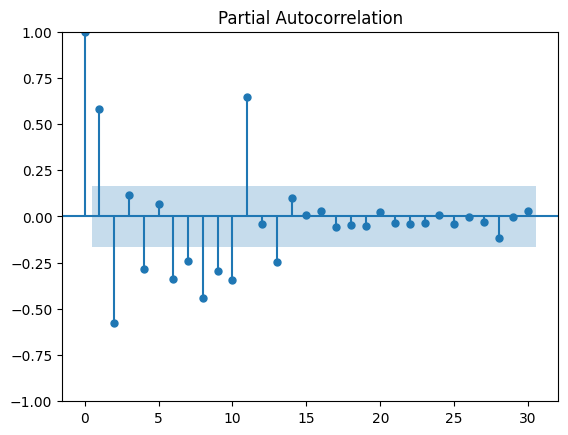

In [17]:
# Building...
from statsmodels.tsa.stattools import acf,pacf
import statsmodels.api as sm
fig = sm.graphics.tsa.plot_acf(diff,lags=30) # per month 30 days
fig = sm.graphics.tsa.plot_pacf(diff,lags=30) # per month 30 days

# from this we knew that AR = 11 records, MA = 12 records

In [18]:
import statsmodels

# Auto Regression modelling...

In [19]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score

# Example data preparation (Ensure y_train and y_test are defined correctly)
# y_train = pd.Series(...)  # Your training data
# y_test = pd.Series(...)   # Your test data

# Fit ARIMA model
model = ARIMA(y_train, order=(11, 0, 0))  # Example order, adjust as needed
ARIMA_model = model.fit()

# Make predictions for training set
ypred_train = ARIMA_model.predict(start=0, end=len(y_train)-1)  # Use integer indices

# Ensure predictions and actual data have the same index type for evaluation
#ypred_train = pd.Series(ypred_train, index=y_train.index)

# Evaluate training set performance
train_r2 = r2_score(y_train, ypred_train)
print("Train R-squared (ARIMA):", train_r2)

# Make predictions for test set
# The start and end should reflect the range of your test data
# Use the index of test data to specify the prediction range
ypred_test = ARIMA_model.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)  # Use integer indices

# Ensure predictions and actual data have the same index type for evaluation
#ypred_test = pd.Series(ypred_test, index=y_test.index)

# Evaluate test set performance
test_r2 = r2_score(y_test, ypred_test)
print("Test R-squared (ARIMA):", test_r2)


C:\Users\RANGUMUDRI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\RANGUMUDRI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\RANGUMUDRI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\RANGUMUDRI\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Train R-squared (ARIMA): 0.9468501887524385
Test R-squared (ARIMA): 0.8415344938162549


C:\Users\RANGUMUDRI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [20]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score

# Example data preparation (Ensure y_train and y_test are defined correctly)
# y_train = pd.Series(...)  # Your training data
# y_test = pd.Series(...)   # Your test data

# Fit ARIMA model
model = ARIMA(y_train, order=(12, 0, 0))  # Example order, adjust as needed
ARIMA_model = model.fit()

# Make predictions for training set
ypred_train = ARIMA_model.predict(start=0, end=len(y_train)-1, typ='levels')  # Ensure integer indices are correct

# If y_train has a specific index, make sure predictions align with it
# yp_train = pd.Series(ypred_train, index=y_train.index)  # Uncomment if needed

# Evaluate training set performance
train_r2 = r2_score(y_train, ypred_train)
print("Train R-squared (ARIMA):", train_r2)

# Make predictions for test set
# The start and end should reflect the range of your test data
ypred_test = ARIMA_model.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, typ='levels')  # Ensure integer indices are correct

# If y_test has a specific index, make sure predictions align with it
# yp_test = pd.Series(ypred_test, index=y_test.index)  # Uncomment if needed

# Evaluate test set performance
test_r2 = r2_score(y_test, ypred_test)
print("Test R-squared (ARIMA):", test_r2)


C:\Users\RANGUMUDRI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\RANGUMUDRI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\RANGUMUDRI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Train R-squared (ARIMA): 0.9452484357493931
Test R-squared (ARIMA): 0.8511300006117253


C:\Users\RANGUMUDRI\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RANGUMUDRI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [21]:
# Ensure diff, y_train, and y_test are defined correctly as per your data setup

from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import r2_score

# Fit ARIMA model
model = ARIMA(y_train, order=(11, 0, 0))  # Example order, adjust as needed
ARIMA_model = model.fit()

# Make predictions for training set
#ypred_train = ARIMA_model.predict(start=y_train.index[0], end=y_train.index[-1])
ypred_train = ARIMA_model.predict(start=0, end=len(y_train)-1)  # Use integer indices



# Evaluate training set performance
train_r2 = r2_score(y_train, ypred_train)
print("Train R-squared (ARIMA):", train_r2)

# Make predictions for test set
ypred_test = ARIMA_model.predict(start=y_train.index[0], end=[(y_train + y_test)].index[-1])
#ypred_test = ARIMA_model.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)  # Use integer indices

# Evaluate test set performance
test_r2 = r2_score(y_test, ypred_test)
print("Test R-squared (ARIMA):", test_r2)


C:\Users\RANGUMUDRI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\RANGUMUDRI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\RANGUMUDRI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Train R-squared (ARIMA): 0.9468501887524385
Test R-squared (ARIMA): 0.8415344938162549


C:\Users\RANGUMUDRI\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RANGUMUDRI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [22]:
ypred_train = pd.Series(ypred_train, index=y_train.index)
ypred_train

2        5.874524
3       13.606753
4        1.714341
5      -12.288365
6       19.505425
          ...    
111     39.380232
112      0.799265
113     86.526296
114    119.127852
115     61.940863
Name: predicted_mean, Length: 114, dtype: float64

In [23]:
import warnings
warnings.simplefilter("ignore")

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(diff,order =(0,0,12)) 
# means AR = 11,I = 0,MA = 0, means this is AR Modelling
ARIMA = model.fit()

#ypred_train = ARIMA.predict(start=y_train.index[0],end=y_train.index[-1])
ypred_train = ARIMA_model.predict(start=0, end=len(y_train)-1)  # Use integer indices


from sklearn.metrics import r2_score
print("train_r2_ARIMA ",r2_score(y_train,ypred_train))

#ypred_test = ARIMA.predict(start=y_test.index[0],end=y_test.index[-1])
ypred_test = ARIMA_model.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)  # Use integer indices


print("test_r2_ARIMA ",r2_score(y_test,ypred_test))


train_r2_ARIMA  0.9468501887524385
test_r2_ARIMA  0.8415344938162549


In [24]:
import warnings
warnings.simplefilter("ignore")

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(diff,order =(11,0,12)) 
# means AR = 11,I = 0,MA = 12, means this is ARMA Modelling
ARIMA = model.fit()

ypred_train = ARIMA.predict(start=y_train.index[0],end=y_train.index[-1])

from sklearn.metrics import r2_score
print("train_r2_ARIMA ",r2_score(y_train,ypred_train))

ypred_test = ARIMA.predict(start=y_test.index[0],end=y_test.index[-1])

print("test_r2_ARIMA ",r2_score(ypred_test,y_test))


train_r2_ARIMA  -1.240310483725136
test_r2_ARIMA  -1.2717811564079118


In [25]:
import warnings
warnings.simplefilter("ignore")

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(diff,order =(11,1,12)) # i =1/2/3...check
# means AR = 11,I = 1,MA = 12, means this is ARIMA Modelling
ARIMA = model.fit()

ypred_train = ARIMA.predict(start=y_train.index[0],end=y_train.index[-1])

from sklearn.metrics import r2_score
print("train_r2_ARIMA ",r2_score(ypred_train,y_train))

ypred_test = ARIMA.predict(start=y_test.index[0],end=y_test.index[-1])

print("test_r2_ARIMA ",r2_score(ypred_test,y_test))


train_r2_ARIMA  -1.3175263126607697
test_r2_ARIMA  -1.2695571605838736


In [26]:
import warnings
warnings.simplefilter("ignore")

from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(diff,seasonal_order =(11,0,12,12)) 
# means AR = 11,I = 0,MA = 12,S(seasonal) = 12, pattern repeats for 12 months
SARIMAX = model.fit()

ypred_train = SARIMAX.predict(start=y_train.index[0],end=y_train.index[-1])

from sklearn.metrics import r2_score
print("train_r2_ARIMA ",r2_score(y_train,ypred_train))

ypred_test = SARIMAX.predict(start=y_test.index[0],end=y_test.index[-1])

print("test_r2_ARIMA ",r2_score(y_test,ypred_test))


train_r2_ARIMA  -1.0160725403010784
test_r2_ARIMA  -0.7247156415741756


In [27]:
start=y_train.index[0]
start

2

In [28]:
y_train.index

Index([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
       ...
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115],
      dtype='int64', length=114)

In [29]:
y_train.index[0]

2

In [30]:
y_train.index[-1]

115

In [31]:
import statsmodels